In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
# Leer el archivo de texto y guardarlo como un DataFrame de pandas
filename = 'Ejercicio_mental.txt'
data = pd.read_csv(filename, delimiter=",", skiprows=5)

# Los ocho canales
data1 = data.iloc[:,0].values
data2 = data.iloc[:,1].values
data3 = data.iloc[:,2].values
data4 = data.iloc[:,3].values
data5 = data.iloc[:,4].values
data6 = data.iloc[:,5].values
data7 = data.iloc[:,6].values
data8 = data.iloc[:,7].values

# **Analisis en frecuencia**

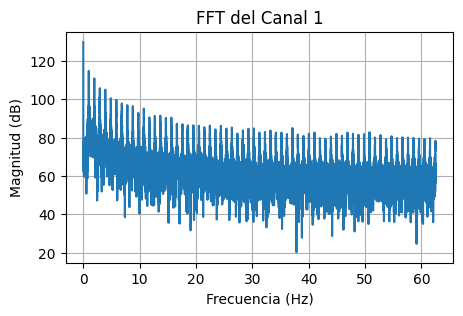

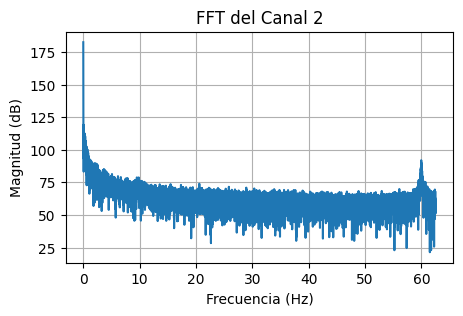

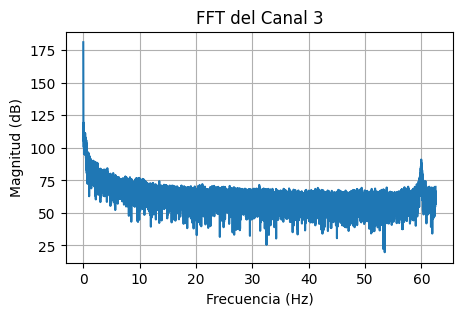

<ipython-input-111-e5816a87ea50>:9: RuntimeWarning: divide by zero encountered in log10
  fft_data_db = 20 * np.log10(fft_Data)


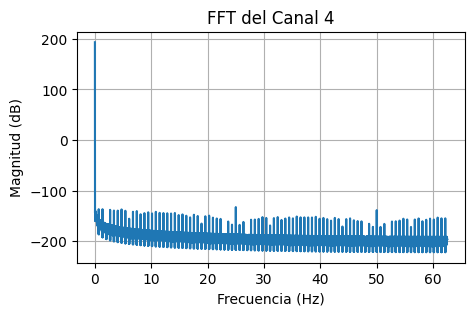

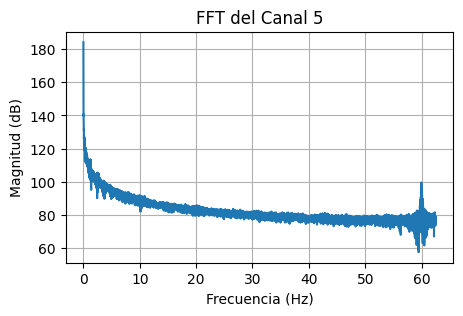

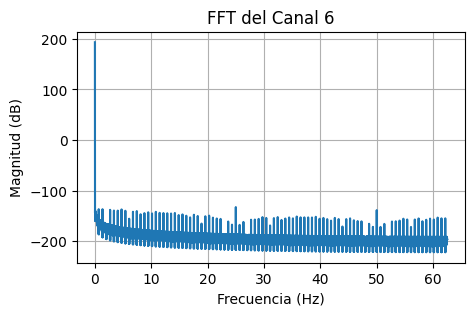

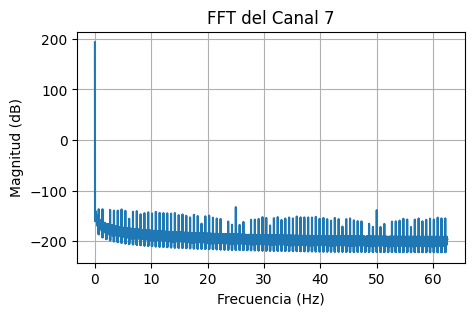

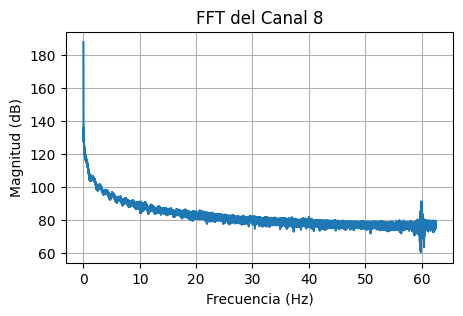

In [111]:
# Definir la frecuencia de muestreo y la cantidad de muestras
fs = 125 # Frecuencia de muestreo de la señal (en Hz)
n_samples = len(data1)

# Calcular la transformada de Fourier para cada variable
freqs = np.fft.rfftfreq(n_samples, 1/fs)
def Fourier(Data, nombre):
    fft_Data = np.abs(np.fft.rfft(Data))
    fft_data_db = 20 * np.log10(fft_Data)
    plt.figure(figsize=(5,3))
    plt.plot(freqs, fft_data_db)
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud (dB)')
    plt.title(nombre)
    plt.grid()
    plt.show()
    
for i in range(0,8):
    name = 'FFT del Canal ' + str(i+1)
    Fourier(data.iloc[:,i].values,name)

# **Filtrado**

Text(0, 0.5, 'Magnitud')

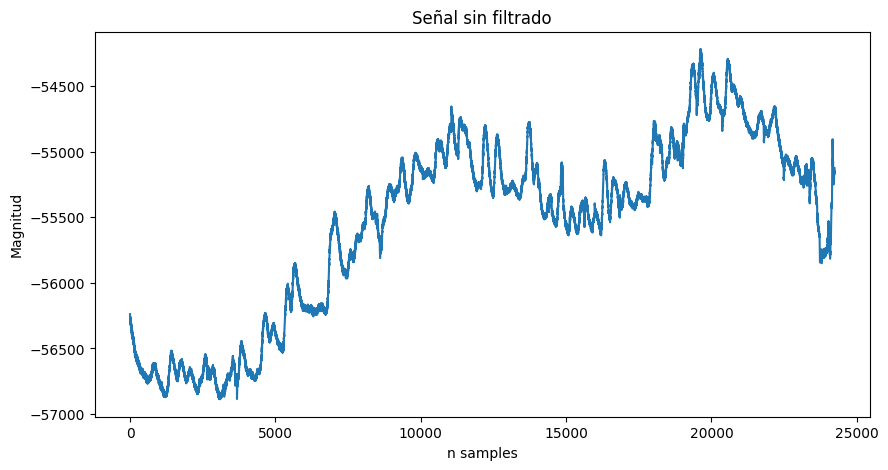

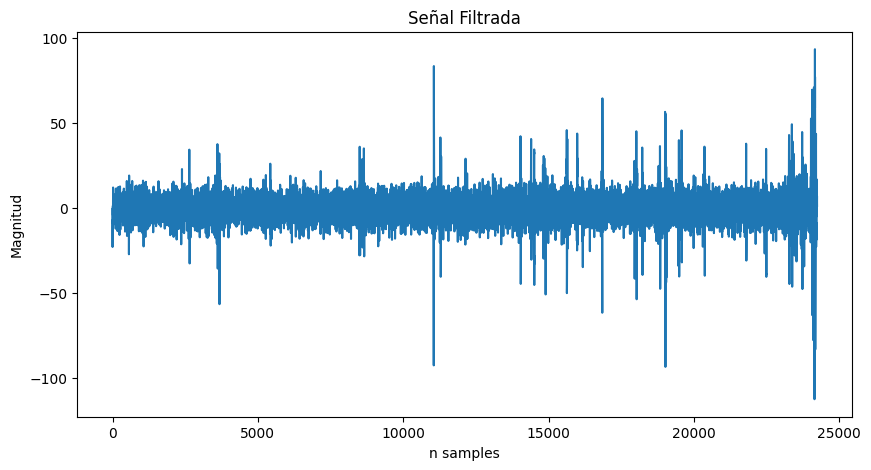

In [112]:
fs = 125 # Frecuencia de muestreo de la señal (en Hz)
lowcut = 3 # Frecuencia de corte inferior (en Hz)
highcut = 30 # Frecuencia de corte superior (en Hz)

# Calcular las frecuencias normalizadas de corte
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist

# Calcular los coeficientes del filtro Butterworth
order = 8 # Orden del filtro
b1, a1 = butter(order, [low, high], btype='band')

data_filtered = np.empty((0,len(data1)))
for i in range(0,8):
    filtered = filtfilt(b1,a1, data.iloc[:,i].values)
    data_filtered = np.vstack((data_filtered, filtered))
    
plt.figure(figsize=(10,5))
plt.plot(data2)
plt.title("Señal sin filtrado")
plt.xlabel('n samples')
plt.ylabel('Magnitud')


plt.figure(figsize=(10,5))
plt.plot(data_filtered[1])
plt.title("Señal Filtrada")
plt.xlabel('n samples')
plt.ylabel('Magnitud')

# **Normalizacion de la señal**

Text(0, 0.5, 'Magnitud')

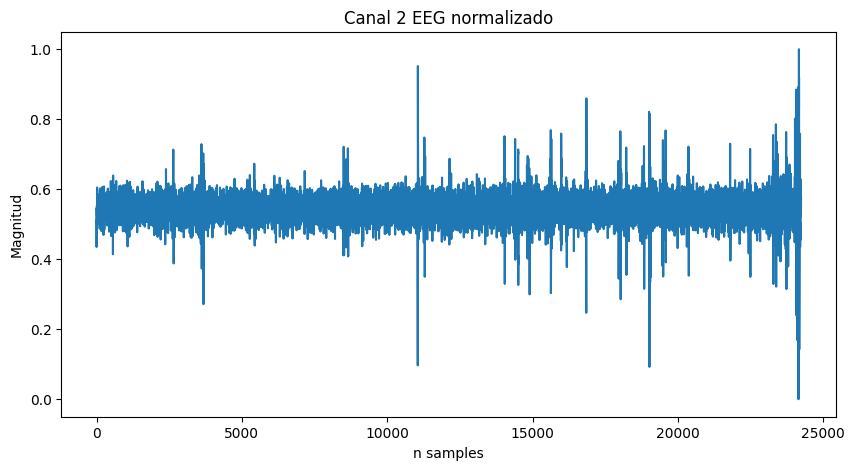

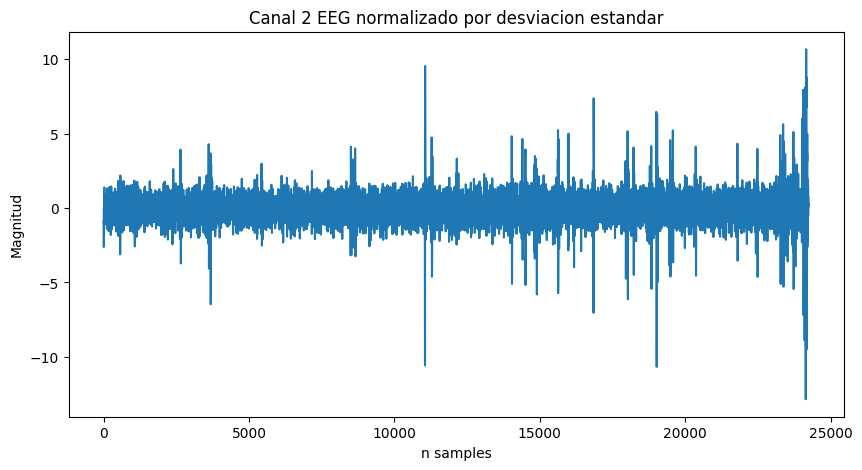

In [113]:
def Normalizacion(data_filtrada):
    mean = np.mean(data_filtrada)
    std = np.std(data_filtrada)
    min = np.min(data_filtrada)
    max = np.max(data_filtrada)

    #Normalización por amplitud máxima
    norm_max = (data_filtrada - min) / (max - min)
    #Normalización por desviación estándar
    norm_std = (data_filtrada - mean) / std
    return (norm_max,norm_std)
lista_normalizaciones = []
for i in range(0,8):
    normalizaciones = Normalizacion(data_filtered[i])
    lista_normalizaciones.append(normalizaciones)

plt.figure(figsize=(10,5))
plt.plot(lista_normalizaciones[1][0])
plt.title("Canal 2 EEG normalizado")
plt.xlabel('n samples')
plt.ylabel('Magnitud')

plt.figure(figsize=(10,5))
plt.plot(lista_normalizaciones[1][1])
plt.title("Canal 2 EEG normalizado por desviacion estandar")
plt.xlabel('n samples')
plt.ylabel('Magnitud')

# **Extraccion de la onda Alfa**

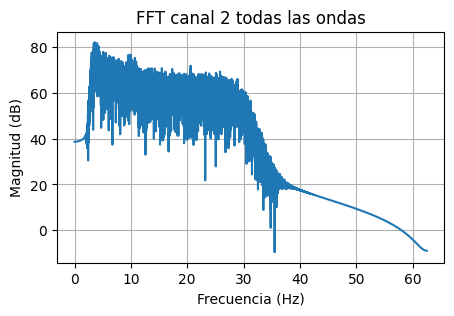

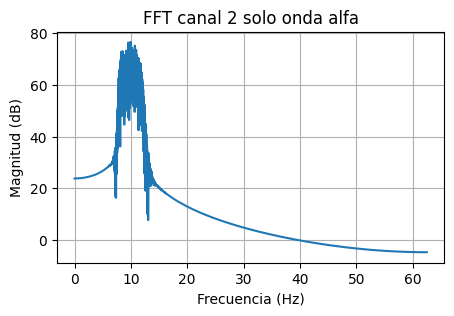

In [114]:
# Definir las frecuencias de corte del filtro
fs = 125 # Frecuencia de muestreo de la señal (en Hz)
lowcut = 8 # Frecuencia de corte inferior (en Hz)
highcut = 12 # Frecuencia de corte superior (en Hz)

# Calcular las frecuencias normalizadas de corte
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist

# Calcular los coeficientes del filtro Butterworth
order = 6 # Orden del filtro
b, a = butter(order, [low, high], btype='band')

# Aplicar el filtro en cascada a la señal de EEG
ondas_alfa = np.empty((0,len(data1)))
for i in range(0,8):
    alfa = filtfilt(b,a,data.iloc[:,i].values,axis=0)
    ondas_alfa = np.vstack((ondas_alfa,alfa))

Fourier(data_filtered[1],'FFT canal 2 todas las ondas')
Fourier(ondas_alfa[1],'FFT canal 2 solo onda alfa')

(2000.0, 4000.0)

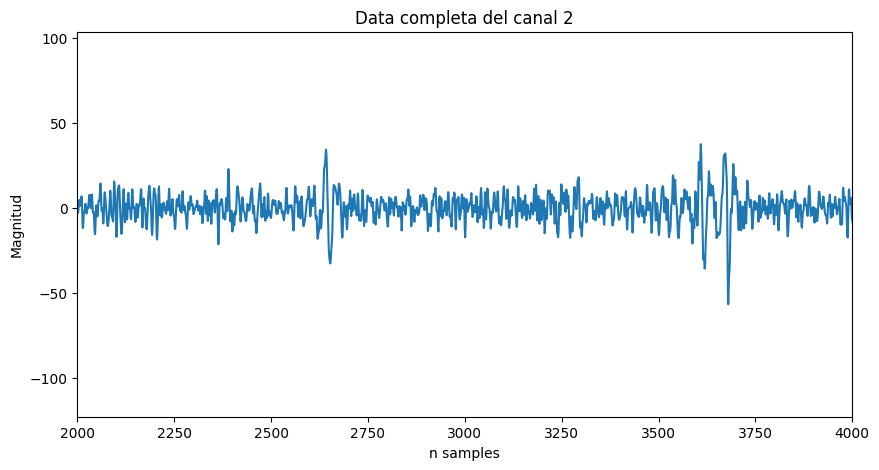

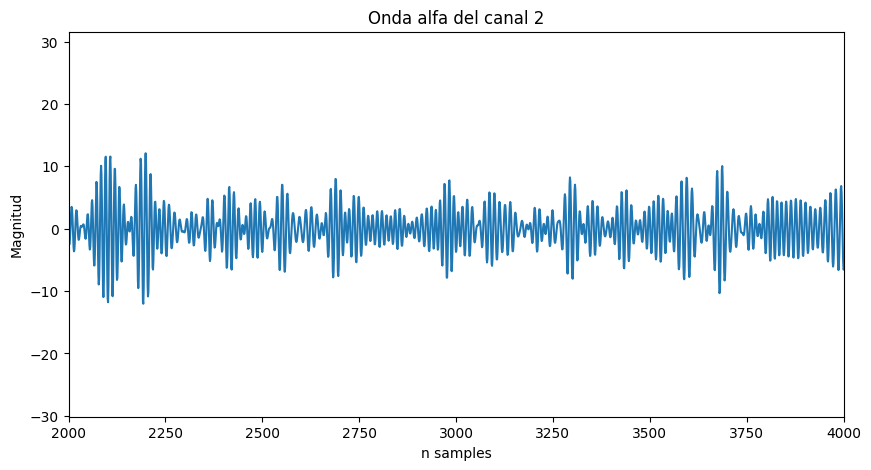

In [115]:
plt.figure(figsize=(10,5))
plt.plot(data_filtered[1])
plt.title("Data completa del canal 2")
plt.xlabel('n samples')
plt.ylabel('Magnitud')
plt.xlim([2000,4000])

plt.figure(figsize=(10,5))
plt.plot(ondas_alfa[1])
plt.title("Onda alfa del canal 2")
plt.xlabel('n samples')
plt.ylabel('Magnitud')
plt.xlim([2000,4000])

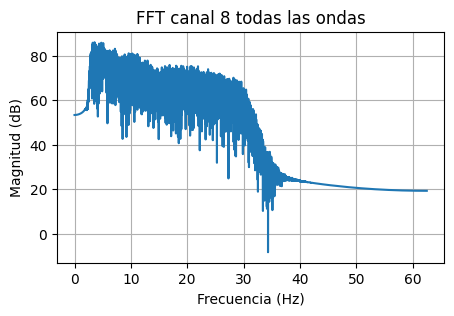

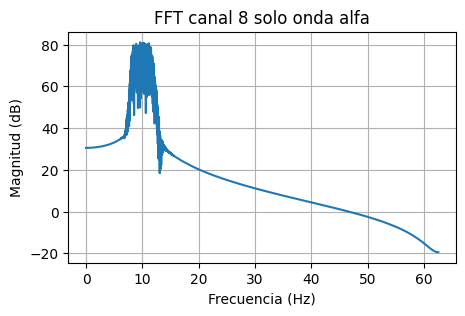

(2000.0, 4000.0)

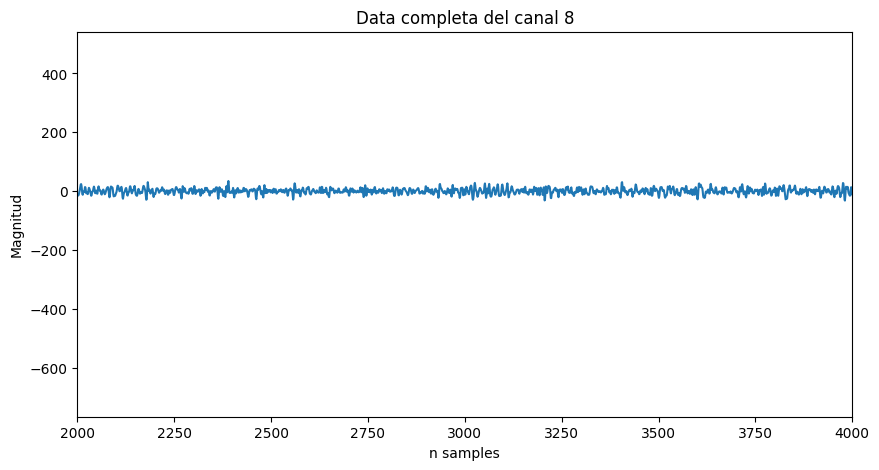

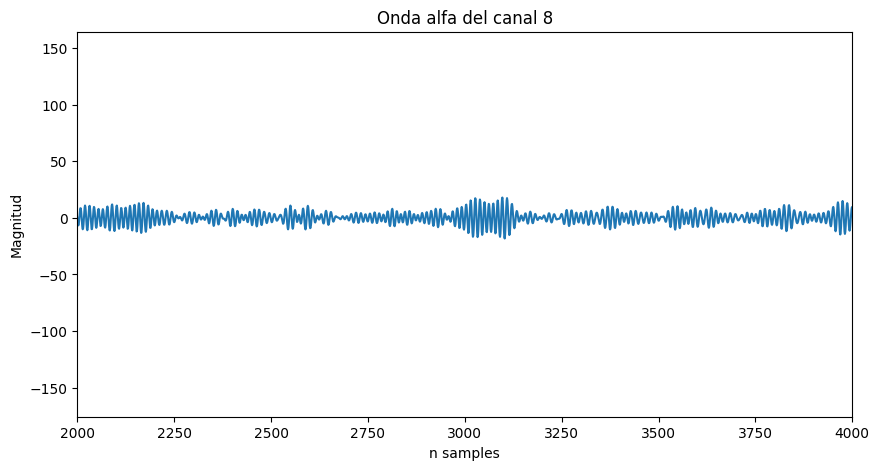

In [116]:
Fourier(data_filtered[7],'FFT canal 8 todas las ondas')
Fourier(ondas_alfa[7],'FFT canal 8 solo onda alfa')

plt.figure(figsize=(10,5))
plt.plot(data_filtered[7])
plt.title("Data completa del canal 8")
plt.xlabel('n samples')
plt.ylabel('Magnitud')
plt.xlim([2000,4000])

plt.figure(figsize=(10,5))
plt.plot(ondas_alfa[7])
plt.title("Onda alfa del canal 8")
plt.xlabel('n samples')
plt.ylabel('Magnitud')
plt.xlim([2000,4000])

# **Extraccion ondas Beta**

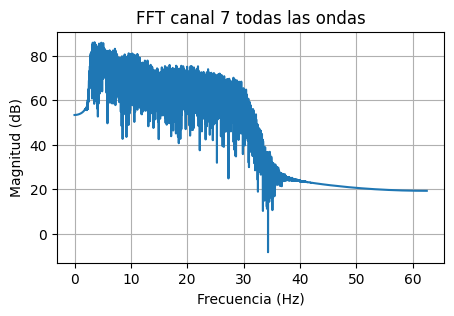

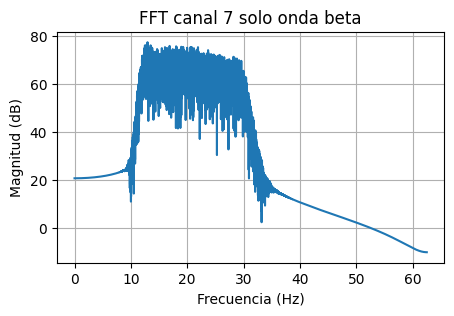

(2000.0, 3000.0)

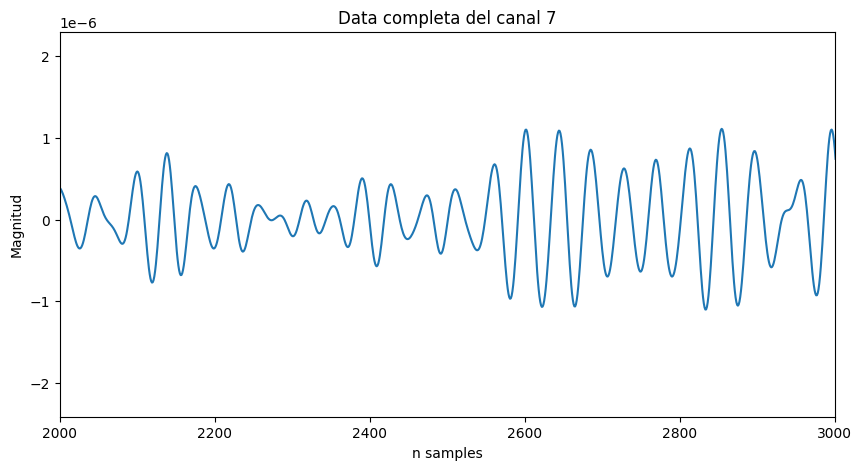

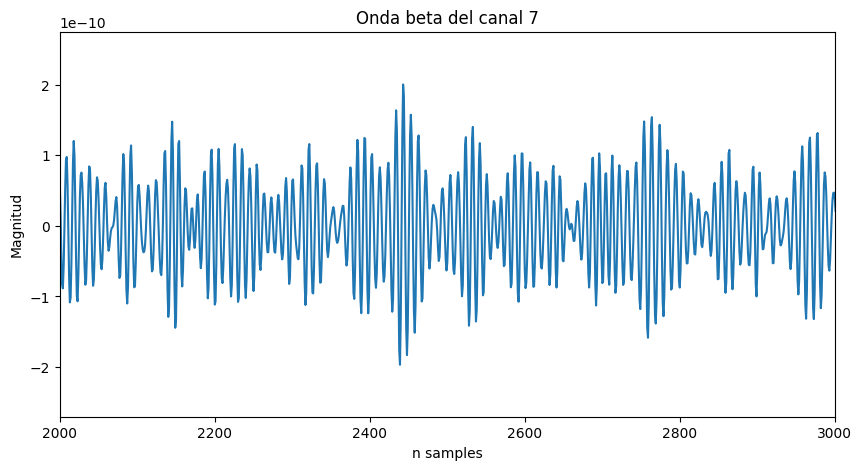

In [117]:
fs = 125 # Frecuencia de muestreo de la señal (en Hz)
lowcut = 12 # Frecuencia de corte inferior (en Hz)
highcut = 30 # Frecuencia de corte superior (en Hz)

# Calcular las frecuencias normalizadas de corte
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist

# Calcular los coeficientes del filtro Butterworth
order = 9 # Orden del filtro
b, a = butter(order, [low, high], btype='band')

# Aplicar el filtro en cascada a la señal de EEG
ondas_beta = np.empty((0,len(data1)))
for i in range(0,8):
    beta = filtfilt(b,a,data.iloc[:,i].values,axis=0)
    ondas_beta = np.vstack((ondas_beta,beta))

Fourier(data_filtered[7],'FFT canal 7 todas las ondas')
Fourier(ondas_beta[7],'FFT canal 7 solo onda beta')

plt.figure(figsize=(10,5))
plt.plot(data_filtered[6])
plt.title("Data completa del canal 7")
plt.xlabel('n samples')
plt.ylabel('Magnitud')
plt.xlim([2000,3000])

plt.figure(figsize=(10,5))
plt.plot(ondas_beta[6])
plt.title("Onda beta del canal 7")
plt.xlabel('n samples')
plt.ylabel('Magnitud')
plt.xlim([2000,3000])

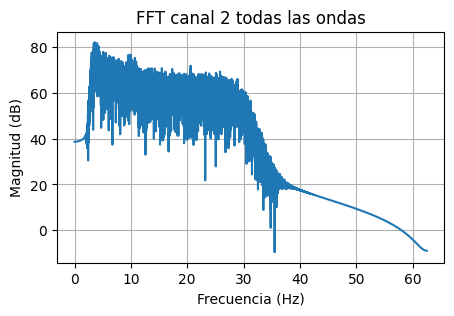

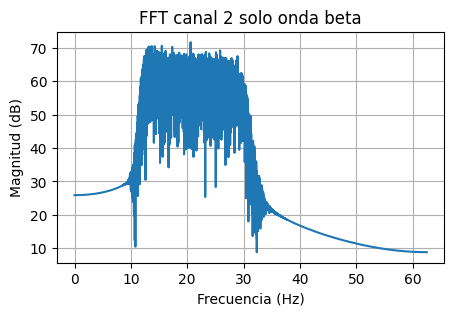

(2000.0, 3000.0)

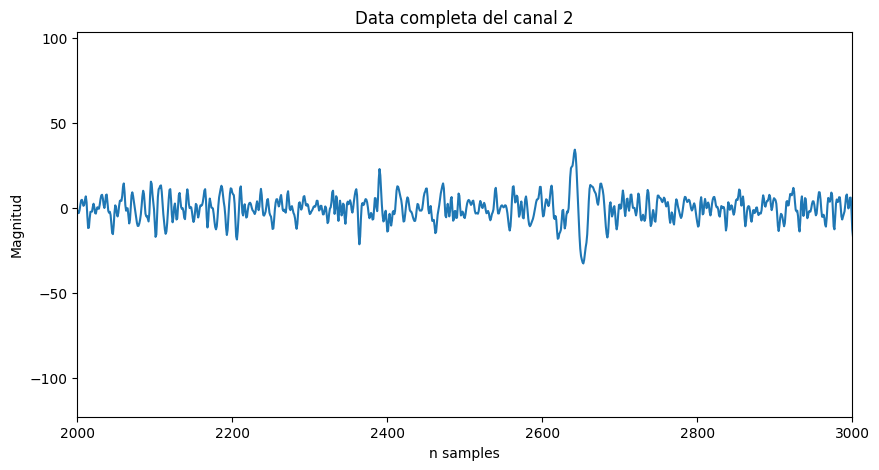

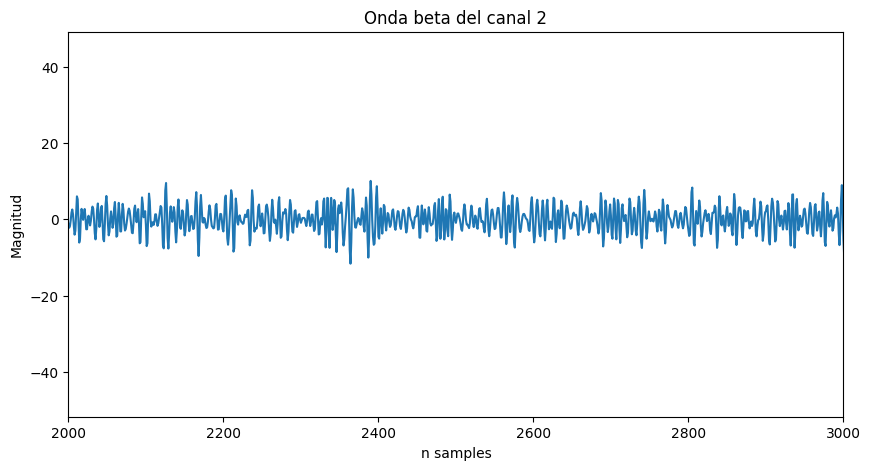

In [118]:
Fourier(data_filtered[1],'FFT canal 2 todas las ondas')
Fourier(ondas_beta[1],'FFT canal 2 solo onda beta')

plt.figure(figsize=(10,5))
plt.plot(data_filtered[1])
plt.title("Data completa del canal 2")
plt.xlabel('n samples')
plt.ylabel('Magnitud')
plt.xlim([2000,3000])

plt.figure(figsize=(10,5))
plt.plot(ondas_beta[1])
plt.title("Onda beta del canal 2")
plt.xlabel('n samples')
plt.ylabel('Magnitud')
plt.xlim([2000,3000])